In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip tf.keras --version

In [ ]:
# !pip install keras==2.1.5

In [ ]:
# !pip install tensorflow==2.2.1

In [ ]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Import system packages
import os
import sys
import time
import logging
import importlib

#Import data manipulation libraries
import numpy as np
import pandas as pd
import collections
from tqdm import tqdm

#Import visualization libraries
import matplotlib.pyplot as plt

#Importing ML/DL libraries
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix,accuracy_score

from keras import initializers
from keras.models import Model, Sequential

from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation 
from keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate
import pickle

import tensorflow as tf

import random
random.seed(123)

In [ ]:
import random

random.seed(9)

## Utils

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("f1 = {}".format(f1_score(labels, predictions, average='weighted')))

In [ ]:
def disp_conf_matrix(train_labels, preds):
  cm = confusion_matrix(train_labels, preds)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

  disp.plot()
  plt.show()

In [ ]:
file_path = "/content/drive/MyDrive/MSDS 498/UNSW_NB15_training-set.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df.tail(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82331,82332,0.000009,udp,-,INT,2,0,104,0,111111.107200,...,1,1,0,0,0,1,1,0,Normal,0


In [ ]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
labels = np.where(df['attack_cat'] == 'Normal', 0, 1)

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.array(np.unique(labels, return_counts=True)).T

array([[    0, 37000],
       [    1, 45332]])

In [ ]:
np.shape(df)

(82332, 45)

In [ ]:
protocols = set(df['proto'])

In [ ]:
print(f'Protocols in the dataset {protocols}')

Protocols in the dataset {'encap', 'micp', 'idrp', 'unas', 'cftp', 'zero', 'ipnip', 'qnx', 'ipcomp', 'compaq-peer', 'ipv6-route', 'pgm', 'irtp', 'il', 'stp', 'ptp', 'ifmp', 'emcon', 'xnet', 'nvp', 'l2tp', 'vrrp', 'crtp', 'ddp', 'igp', 'aes-sp3-d', 'bna', 'swipe', 'sps', 'leaf-2', 'xtp', 'snp', 'hmp', '3pc', 'bbn-rcc', 'rsvp', 'iso-tp4', 'vmtp', 'ttp', 'leaf-1', 'isis', 'narp', 'iso-ip', 'sccopmce', 'trunk-1', 'sctp', 'pipe', 'mhrp', 'trunk-2', 'etherip', 'gre', 'skip', 'mtp', 'ip', 'sm', 'srp', 'pnni', 'br-sat-mon', 'igmp', 'udp', 'ipx-n-ip', 'ipv6', 'fire', 'pim', 'xns-idp', 'tp++', 'ddx', 'merit-inp', 'nsfnet-igp', 'st2', 'cbt', 'tcp', 'argus', 'tcf', 'pvp', 'pri-enc', 'sat-expak', 'gmtp', 'smp', 'netblt', 'cphb', 'dcn', 'aris', 'any', 'idpr-cmtp', 'ipv6-opts', 'arp', 'ospf', 'vines', 'ipv6-no', 'wb-mon', 'crudp', 'kryptolan', 'fc', 'tlsp', 'wb-expak', 'ipcv', 'larp', 'sdrp', 'sun-nd', 'a/n', 'sep', 'egp', 'iplt', 'idpr', 'mfe-nsp', 'rvd', 'ipip', 'ggp', 'ib', 'secure-vmtp', 'scps', 

In [ ]:
df['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [ ]:
prot_dict = {'3pc': 'network',
'a/n': 'network',
'aes-sp3-d': 'network',
'any': 'others',
'argus': 'link',
'aris': 'network',
'arp': 'link',
'ax.25': 'link',
'bbn-rcc':'network',
'bna': 'network',
'br-sat-mon': 'network',
'cbt': 'network',
'cftp': 'application',
'chaos': 'network',
'compaq-peer': 'network',
'cphb': 'network',
'cpnx': 'network',
'crtp': 'transport',
'crudp': 'transport',
'dcn': 'network',
'ddp': 'network',
'ddx': 'network',
'dgp': 'network',
'egp': 'network',
'eigrp': 'network',
'emcon': 'network',
'encap': 'network',
'etherip': 'network',
'fc': 'network',
'fire': 'network',
'ggp': 'network',
'gmtp': 'application',
'gre': 'link',
'hmp': 'network',
'i-nlsp': 'network',
'iatp': 'network',
'ib': 'network',
'icmp': 'network',
'idpr': 'network',
'idpr-cmtp': 'network',
'idrp': 'network',
'ifmp': 'network',
'igmp': 'network',
'igp': 'network',
'il': 'network',
'ip': 'network',
'ipcomp': 'network',
'ipcv': 'network',
'ipip': 'network',
'iplt': 'network',
'ipnip': 'network',
'ippc': 'network',
'ipv6': 'network',
'ipv6-frag': 'network',
'ipv6-no': 'network',
'ipv6-opts': 'network',
'ipv6-route': 'network',
'ipx-n-ip': 'transport',
'irtp': 'transport',
'isis': 'network',
'iso-ip': 'network',
'iso-tp4': 'transport',
'kryptolan': 'application',
'l2tp': 'link',
'larp': 'link',
'leaf-1': 'network',
'leaf-2': 'network',
'merit-inp': 'network',
'mfe-nsp': 'network',
'mhrp': 'network',
'micp': 'others',
'mobile': 'network',
'mtp': 'application',
'mux': 'link',
'narp': 'link',
'netblt': 'transport',
'nsfnet-igp': 'network',
'nvp': 'network',
'ospf': 'network',
'pgm': 'transport',
'pim': 'network',
'pipe': 'network',
'pnni': 'network',
'pri-enc': 'network',
'prm': 'network',
'ptp': 'application',
'pup': 'application',
'pvp': 'application',
'qnx': 'application',
'rdp': 'application',
'rsvp': 'transport',
'rtp': 'application',
'rvd': 'others',
'sat-expak': 'transport',
'sat-mon': 'transport',
'sccopmce': 'transport',
'scps': 'transport',
'sctp': 'transport',
'sdrp': 'transport',
'secure-vmtp': 'transport',
'sep': 'network',
'skip': 'network',
'sm': 'network',
'smp': 'network',
'snp': 'network',
'sprite-rpc': 'network',
'sps': 'network',
'srp': 'network',
'st2': 'network',
'stp': 'link',
'sun-nd': 'network',
'swipe': 'network',
'tcf': 'network',
'tcp': 'transport',
'tlsp': 'transport',
'tp++': 'transport',
'trunk-1': 'link',
'trunk-2': 'link',
'ttp': 'network',
'udp': 'transport',
'unas': 'application',
'uti': 'others',
'vines': 'network',
'visa': 'network',
'vmtp': 'transport',
'vrrp': 'network',
'wb-expak': 'application',
'wb-mon': 'network',
'wsn': 'network',
'xnet': 'network',
'xns-idp': 'network',
'xtp': 'transport',
'zero':'others'
 }

In [ ]:
# Applying dictionary values on protocols dimension in training dataset
# df['proto'] = df['proto'].apply(lambda x: prot_dict[x])

In [ ]:
attack_categories  = set(df['attack_cat'])

print(f'attack categories in the dataset {attack_categories}')

attack categories in the dataset {'Worms', 'Reconnaissance', 'Generic', 'Analysis', 'Backdoor', 'Fuzzers', 'DoS', 'Exploits', 'Shellcode', 'Normal'}


In [ ]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [ ]:
df['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [ ]:
set(df['service'])

{'-',
 'dhcp',
 'dns',
 'ftp',
 'ftp-data',
 'http',
 'irc',
 'pop3',
 'radius',
 'smtp',
 'snmp',
 'ssh',
 'ssl'}

In [ ]:
# Check for Object Type variables
oTV = []
for feature in df.columns:
 if df[feature].dtype == 'object':
    oTV.append(feature)

print("Object type variables = ",oTV)
for feature in oTV:
 print(f'\nVariable Name: {feature} and distinct values count: {df[feature].value_counts().count()}')
 diff = set(df[feature].value_counts().index.to_list()) - set(df[feature].value_counts().index.to_list())
 if diff:
  print("Extra categorical values in Test data is/are = %s"%diff)
 else:
  print("No different values in test data")

Object type variables =  ['proto', 'service', 'state', 'attack_cat']

Variable Name: proto and distinct values count: 131
No different values in test data

Variable Name: service and distinct values count: 13
No different values in test data

Variable Name: state and distinct values count: 7
No different values in test data

Variable Name: attack_cat and distinct values count: 10
No different values in test data


In [ ]:
features_to_encode = ['service', 'state']
lbl_columns = ['attack_cat', 'label']

In [ ]:
encoded_df = pd.get_dummies(df,columns=features_to_encode,drop_first=True)

In [ ]:
features_to_exclude =  lbl_columns + ['id', 'proto']

In [ ]:
features_to_exclude

['attack_cat', 'label', 'id', 'proto']

In [ ]:
encoded_df.head(2)

,id,dur,proto,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,udp,2,0,496,0,90909.0902,254,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,udp,2,0,1762,0,125000.0003,254,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
len(encoded_df.columns)

61

In [ ]:
X = encoded_df.drop(features_to_exclude, axis=1)

In [ ]:
len(X.columns)

57

In [ ]:
X.head(2)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X.shape

(82332, 57)

In [ ]:
y = labels

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
y.shape

(82332,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

In [ ]:
x_train.shape

(65865, 57)

In [ ]:
np.shape(y_train)

(65865,)

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
np.unique(y_test)

array([0, 1])

In [ ]:
#Subsetting only Normal Network packets in our training set
x_org = x_train.copy()
temp_df = x_train.copy()
temp_df['label'] = y_train
temp_df_norm = temp_df.loc[temp_df['label'] == 0]
temp_df_norm = temp_df_norm.drop('label', axis = 1)
x_train = temp_df_norm.copy()

In [ ]:
temp_df_abnorm = x_org.copy()
temp_df_abnorm['label'] = y_train
temp_df_abnorm = temp_df_abnorm.loc[temp_df_abnorm['label'] == 1]
temp_df_abnorm = temp_df_abnorm.drop('label', axis = 1)
x_train_ab = temp_df_abnorm.copy()

In [ ]:
# # Normalize the above splits using the MinMaxScaler from the scikit learn package
scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# Make sure to only fit the scaler on the training data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler(with_mean=False)
# x_train = scaler.fit_transform(x_train)
# x_train_ab = scaler.fit_transform(x_train_ab)
# x_test = scaler.transform(x_test)


#Creating dataset dictionary 

x_train = x_train.astype(np.float32)
x_test  = x_test.astype(np.float32)


In [ ]:
x_train_ab = scaler.fit_transform(x_train_ab)
x_train_ab = x_train_ab.astype(np.float32)

In [ ]:
x_train.shape

(29607, 57)

In [ ]:
print('Number of examples in the training set:', x_train.shape[0])

Number of examples in the training set: 29607


In [ ]:
print('Number of examples in the testing set:', x_test.shape[0])

Number of examples in the testing set: 16467


In [ ]:
# check how many anomalies are in our Testing set
print('Number of Normal Network packets in the Training set:', x_train.shape[0])
print('Number of Normal Network packets in the Testing set:', collections.Counter(y_test)[0])
print('Number of Anomalous Network packets in the Testing set:', collections.Counter(y_test)[1])

Number of Normal Network packets in the Training set: 29607
Number of Normal Network packets in the Testing set: 7393
Number of Anomalous Network packets in the Testing set: 9074


## Autoencoder

In [ ]:
no_of_features = x_train.shape[1]
print(f'no of features {no_of_features}')

no of features 57


In [ ]:
from tensorflow.keras.layers import Lambda, Input, Dense

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      Dense(64, activation="tanh"),
      Dense(32, activation="tanh"),
      Dense(16, activation="tanh")])
    
    self.decoder = tf.keras.Sequential([
      Dense(16, activation="tanh"),
      Dense(32, activation="tanh"),
      Dense(no_of_features, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
# autoencoder.compile(optimizer='adam', loss='mae')
# 
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
history = autoencoder.fit(x_train, x_train , 
          epochs=100, 
          batch_size=512,
          validation_data=(x_test, x_test ))

Epoch 1/100
58/58 [==============================] - 3s 17ms/step - loss: 0.1509 - val_loss: 0.1621
Epoch 2/100
58/58 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.1351
Epoch 3/100
58/58 [==============================] - 1s 10ms/step - loss: 0.0320 - val_loss: 0.1255
Epoch 4/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0271 - val_loss: 0.1233
Epoch 5/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0249 - val_loss: 0.1220
Epoch 6/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0232 - val_loss: 0.1206
Epoch 7/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0212 - val_loss: 0.1182
Epoch 8/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0185 - val_loss: 0.1156
Epoch 9/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0162 - val_loss: 0.1135
Epoch 10/100
58/58 [==============================] - 0s 8ms/step - loss: 0.0146 - val_loss: 0.1120
Epoch 1

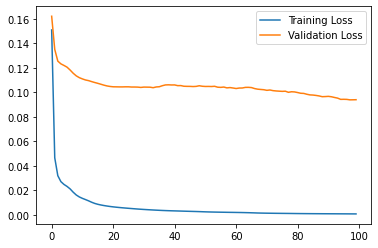

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

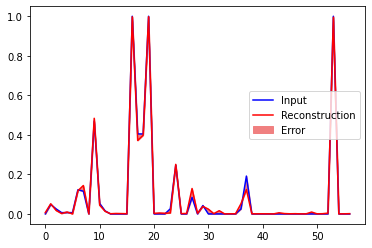

In [ ]:
encoded_data = autoencoder.encoder(x_train).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(x_train[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(no_of_features), decoded_data[0], x_train[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

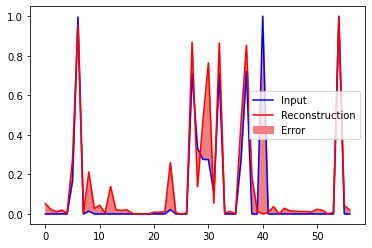

In [ ]:
encoded_data = autoencoder.encoder(x_train_ab).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(x_train_ab[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(no_of_features), decoded_data[0], x_train_ab[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies
Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

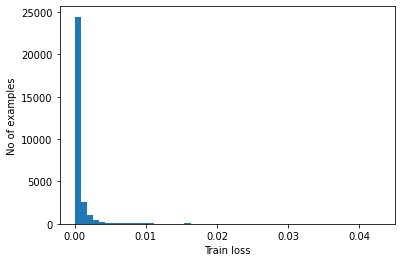

In [ ]:
reconstructions = autoencoder.predict(x_train)
train_loss = tf.keras.losses.mse(reconstructions, x_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [ ]:
av_loss_norm = np.mean(train_loss) 
print("avg normal loss: ", av_loss_norm)

avg normal loss:  0.0008004027


In [ ]:
threshold = av_loss_norm + np.std(train_loss)
print("Threshold for normal: ", threshold)

Threshold for normal:  0.0027314364


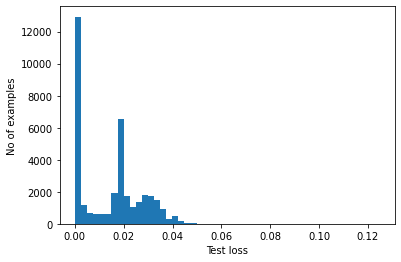

In [ ]:
reconstructions_ab = autoencoder.predict(x_train_ab)
test_loss_ab = tf.keras.losses.mse(reconstructions_ab, x_train_ab)

plt.hist(test_loss_ab[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
avg_loss_ab = np.mean(test_loss_ab)
print("average abnormal loss: ", avg_loss_ab)

average abnormal loss:  0.014521251


In [ ]:
threshold_ab = avg_loss_ab + np.std(test_loss_ab)
print("Threshold for abnormal: ", threshold_ab)

Threshold for abnormal:  0.027427074


In [ ]:
reconstructions = autoencoder.predict(x_test)
test_loss = tf.keras.losses.mse(reconstructions, x_test)

In [ ]:
print(f'threshold for testing is {threshold}')

threshold for testing is 0.0027314363978803158


In [ ]:
threshold_perce = np.percentile(train_loss, 85)

In [ ]:
threshold_perce

0.0010475385934114456

In [ ]:
anomalies = (test_loss > threshold_perce)

In [ ]:
print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7393
           1       0.86      0.76      0.81      9074

    accuracy                           0.80     16467
   macro avg       0.80      0.80      0.80     16467
weighted avg       0.81      0.80      0.80     16467



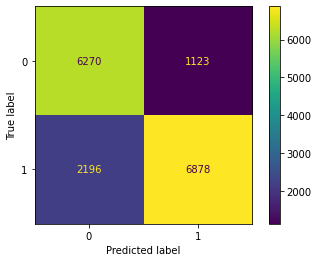

In [ ]:
disp_conf_matrix(y_test, anomalies)

### Visualize the Latent Layer

In [ ]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [ ]:
X_encoded = autoencoder.encoder(x_test)

In [ ]:
X_encoded.shape

TensorShape([16467, 16])

In [ ]:
reconstructions = autoencoder.predict(x_test)
mse_vector = tf.keras.losses.mse(reconstructions, x_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transform = pca.fit_transform(X_encoded)

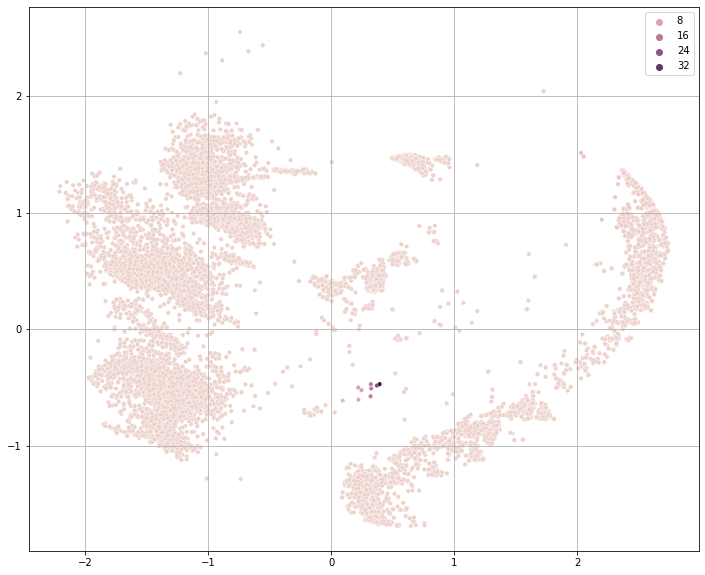

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], s=20, hue=mse_vector)
plt.grid()
plt.show()

In [ ]:
anomalies = (mse_vector > threshold)

np.count_nonzero(anomalies) / len(anomalies)

0.3807007955304548

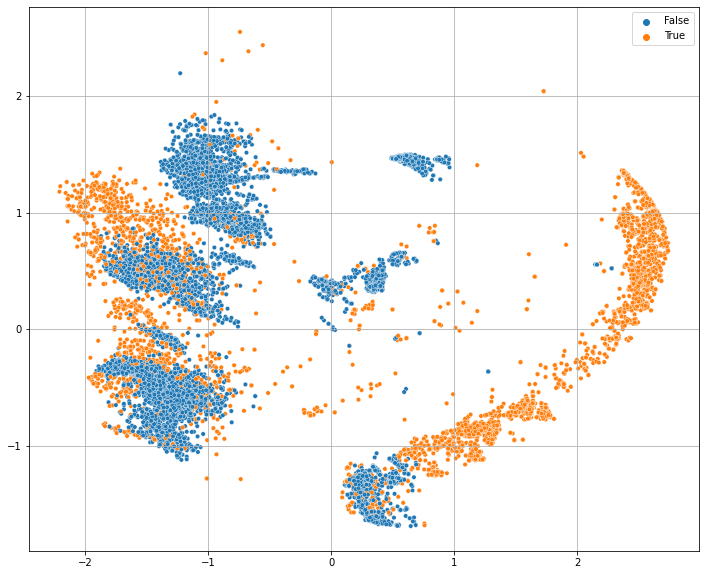

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], s=20, hue=anomalies)
plt.grid()
plt.show()

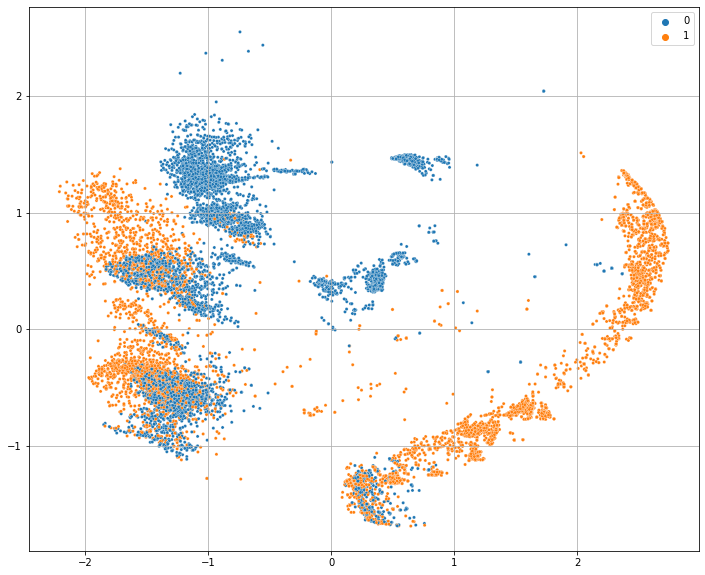

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_transform[:, 0], y=X_transform[:, 1], s=10, hue=y_test)
plt.grid()
plt.show()

## VAE

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]    
    epsilon = K.random_normal(shape=(batch, dim))  # by default, random_normal has mean=0 and std=1.0
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
# network parameters and learning parameters
input_shape = (no_of_features, )
intermediate_dim = 64
batch_size = 512
latent_dim = 32
epochs = 100

In [ ]:
from keras.layers import Lambda
from keras import backend as K

In [ ]:
# encoder model
inputs = Input(shape=no_of_features, name='encoder_input')
x = Dense(intermediate_dim, activation='tanh')(inputs)
x = Dense(intermediate_dim/2, activation='tanh')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# sampling 
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var]) 

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 57)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 64)           3712        ['encoder_input[0][0]']          
                                                                                                  
 dense_7 (Dense)                (None, 32)           2080        ['dense_6[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 32)           1056        ['dense_7[0][0]']                
                                                                                            

In [ ]:
# decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim/2, activation='tanh')(latent_inputs)
x = Dense(intermediate_dim, activation='tanh')(x)
outputs = Dense(no_of_features, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 32)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 57)                3705      
                                                                 
Total params: 6,873
Trainable params: 6,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
vae.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 57)]              0         
                                                                 
 encoder (Functional)        [(None, 32),              7904      
                              (None, 32),                        
                              (None, 32)]                        
                                                                 
 decoder (Functional)        (None, 57)                6873      
                                                                 
Total params: 14,777
Trainable params: 14,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.losses import mse, binary_crossentropy

# VAE loss
reconstruction_loss = mse(inputs, outputs)
# reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= no_of_features
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
# vae_loss = K.mean(reconstruction_loss)

In [ ]:
# vae.compile(optimizer='adam', loss=vae_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 57)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 32),         7904        ['encoder_input[0][0]']          
                                 (None, 32),                                                      
                                 (None, 32)]                                                      
                                                                                                  
 decoder (Functional)           (None, 57)           6873        ['encoder[0][2]']                
                                                                                                

In [ ]:
history_vae = vae.fit(x_train, x_train, 
          epochs=100, 
          batch_size=320,
          validation_data=(x_test, x_test),
          shuffle=True)

Epoch 1/100
93/93 [==============================] - 1s 7ms/step - loss: 7.6737 - val_loss: 10.7928
Epoch 2/100
93/93 [==============================] - 1s 5ms/step - loss: 4.1273 - val_loss: 10.0274
Epoch 3/100
93/93 [==============================] - 1s 5ms/step - loss: 3.2826 - val_loss: 8.8190
Epoch 4/100
93/93 [==============================] - 1s 5ms/step - loss: 2.2921 - val_loss: 8.5730
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 2.2088 - val_loss: 8.5298
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 2.1986 - val_loss: 8.4743
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 2.1952 - val_loss: 8.4728
Epoch 8/100
93/93 [==============================] - 1s 5ms/step - loss: 2.1882 - val_loss: 8.4148
Epoch 9/100
93/93 [==============================] - 1s 5ms/step - loss: 2.1739 - val_loss: 8.3136
Epoch 10/100
93/93 [==============================] - 0s 5ms/step - loss: 2.1480 - val_loss: 8.2741
Epoch 1

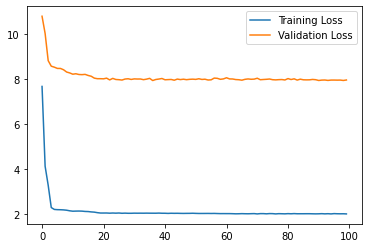

In [ ]:
plt.plot(history_vae.history["loss"], label="Training Loss")
plt.plot(history_vae.history["val_loss"], label="Validation Loss")
plt.legend()

### Detect Anomalies using Variational Autoencoder

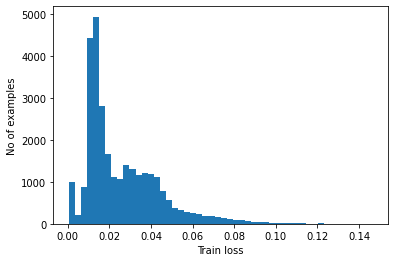

In [ ]:
reconstructions = vae.predict(x_train)
train_loss = tf.keras.losses.mse(reconstructions, x_train)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  0.043882795


In [ ]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [ ]:
reconstructions = vae.predict(x_train_ab)
test_loss = tf.keras.losses.mse(reconstructions, x_train_ab)

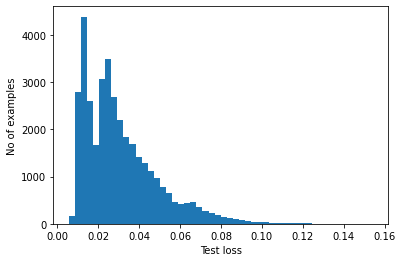

In [ ]:
plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

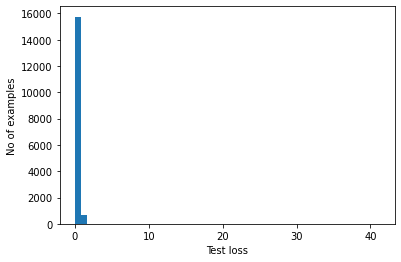

In [ ]:
reconstructions = vae.predict(x_test)
test_loss = tf.keras.losses.mse(reconstructions, x_test)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
test_loss

<tf.Tensor: shape=(16467,), dtype=float32, numpy=
array([0.01948017, 0.01179655, 0.68813884, ..., 0.01967648, 0.03037969,
       0.03631016], dtype=float32)>

In [ ]:
y_test.shape

(16467,)

In [ ]:
threshold_perce = np.percentile(train_loss, 70)

In [ ]:
anomalies = (test_loss > threshold_perce)

In [ ]:
anomalies.shape

TensorShape([16467])

In [ ]:
print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62      7393
           1       0.69      0.55      0.61      9074

    accuracy                           0.62     16467
   macro avg       0.63      0.63      0.62     16467
weighted avg       0.63      0.62      0.62     16467



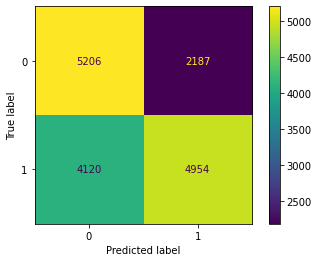

In [ ]:
disp_conf_matrix(y_test, anomalies)

## GAN

In [ ]:
# Defining the Generator network

def get_generator(optimizer, input_dim, output_dim):
    
    generator = Sequential()
    generator.add(Dense(128, input_dim=input_dim, kernel_initializer=initializers.glorot_normal()))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(64))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(output_dim, activation='relu'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [ ]:
##### Defining the Discriminator network

def get_discriminator(optimizer, input_dim):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(128, input_dim=input_dim, kernel_initializer=initializers.glorot_normal()))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(64))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(32))
    discriminator.add(Activation('tanh'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [ ]:
#### Defining the encoder network

def get_encoder(optimizer, input_dim, latent_dim = 16):
    
    encoder = Sequential()
    
    encoder.add(Dense(128, input_dim=input_dim, kernel_initializer=initializers.glorot_normal()))
    encoder.add(Activation('tanh'))

    encoder.add(Dense(64))
    encoder.add(Activation('tanh'))

    encoder.add(Dense(latent_dim))
    encoder.add(Activation('tanh'))
   
    # encoder.compile(loss='mse', optimizer=optimizer)

    return encoder

In [ ]:
#### Defining the decoder network

def get_decoder(optimizer, latent_dim, output_dim):
    
    decoder = Sequential()
    
    decoder.add(Dense(16, input_dim=latent_dim, kernel_initializer=initializers.glorot_normal()))
    decoder.add(Activation('tanh'))

    decoder.add(Dense(32))
    decoder.add(Activation('tanh'))

    decoder.add(Dense(output_dim))
    decoder.add(Activation('sigmoid'))
   
    # decoder.compile(loss='mse', optimizer=optimizer)

    return decoder

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      Dense(64, activation="tanh"),
      Dense(32, activation="tanh"),
      Dense(16, activation="tanh")])
    
    self.decoder = tf.keras.Sequential([
      Dense(16, activation="tanh"),
      Dense(32, activation="tanh"),
      Dense(no_of_features, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder_gan = AutoEncoder()
autoencoder_gan.compile(optimizer='adam', loss='mse')

In [ ]:
from keras.layers import concatenate
def get_gan_network(discriminator, generator, optimizer,input_dim):

  discriminator.trainable = False   
  gan_input = Input(shape=(input_dim,))  
  x = generator(gan_input)   
  x_upd = concatenate((x, gan_input), axis=1)

  gan_output = discriminator(x_upd)

  gan = Model(inputs=gan_input, outputs=gan_output)    
  gan.compile(loss='binary_crossentropy', optimizer=optimizer)

  return gan

In [ ]:
def get_ae(encoder, decoder, optimizer, input_dim):
  en_input = Input(shape=(input_dim,))  
  x = encoder(en_input)   

  en_output = decoder(x)

  ae = Model(inputs=en_input, outputs=en_output)    
  ae.compile(loss='mse', optimizer=optimizer)

  return ae


In [ ]:
latent_dim = 16
no_of_features = x_train.shape[1]
total_dim = latent_dim + no_of_features

In [ ]:
learning_rate = 0.00001
batch_size = 256
epochs = 100
adam = Adam(lr = learning_rate,beta_1 = 0.5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
#Training the GAN
# x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'],dataset['x_test'],dataset['y_test']

#Calculating the number of batches based on the batch size
batch_count = x_train.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []
auto_loss = []

#Inititalizing the network
generator = get_generator(adam, latent_dim, no_of_features)
discriminator = get_discriminator(adam, total_dim)
gan = get_gan_network(discriminator, generator, adam,input_dim=latent_dim)

encoder = get_encoder(adam, no_of_features, latent_dim)
decoder = get_decoder(adam, latent_dim, no_of_features)
ae = get_ae(encoder, decoder, adam, no_of_features)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        image_batch = x_train[index * batch_size: (index + 1) * batch_size]

        ###train autoencoder
        a_loss = autoencoder_gan.train_on_batch(image_batch, image_batch)
        auto_loss.append(a_loss)

        ###train discriminator
        discriminator.trainable = True
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,latent_dim])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        conc_gen_out = np.concatenate((generated_images, noise), axis=1)
        
        #Obtain a batch of normal network packets
        image_encoded = autoencoder_gan.encoder(image_batch)

        conc_norm_out = np.concatenate((image_encoded, image_batch), axis=1)

        X = np.vstack((conc_gen_out,conc_norm_out))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        d_loss= discriminator.train_on_batch(X, y_dis)

        ##### Train generator
        discriminator.trainable = False
        noise = np.random.uniform(0, 1, size=[batch_size, latent_dim])
        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

        # generated_images = generator.predict_on_batch(noise)
        # conc_gen_out = np.concatenate((generated_images, noise), axis=1)

        # y_gen = np.ones(batch_size)
        # discriminator.trainable = False
        # g_loss= discriminator.train_on_batch(conc_gen_out, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f][AE loss:%f]" % (epoch,index,batch_count, d_loss, g_loss, a_loss))
              

  1%|          | 118/11500 [00:08<13:53, 13.66it/s]

Epoch 0 Batch 114/115 [D loss: 0.529227] [G loss:0.505640][AE loss:0.037632]


  2%|▏         | 232/11500 [00:17<13:11, 14.24it/s]

Epoch 1 Batch 114/115 [D loss: 0.479009] [G loss:0.366316][AE loss:0.030820]


  3%|▎         | 348/11500 [00:25<13:25, 13.84it/s]

Epoch 2 Batch 114/115 [D loss: 0.407026] [G loss:0.272271][AE loss:0.023666]


  4%|▍         | 462/11500 [00:33<13:15, 13.88it/s]

Epoch 3 Batch 114/115 [D loss: 0.403271] [G loss:0.216234][AE loss:0.019197]


  5%|▌         | 577/11500 [00:43<13:27, 13.53it/s]

Epoch 4 Batch 114/115 [D loss: 0.410293] [G loss:0.193425][AE loss:0.013857]


  6%|▌         | 693/11500 [00:51<13:23, 13.45it/s]

Epoch 5 Batch 114/115 [D loss: 0.368512] [G loss:0.203712][AE loss:0.011317]


  7%|▋         | 807/11500 [00:59<12:46, 13.96it/s]

Epoch 6 Batch 114/115 [D loss: 0.360272] [G loss:0.216123][AE loss:0.009723]


  8%|▊         | 922/11500 [01:09<12:40, 13.91it/s]

Epoch 7 Batch 114/115 [D loss: 0.316226] [G loss:0.270547][AE loss:0.008655]


  9%|▉         | 1038/11500 [01:17<12:17, 14.18it/s]

Epoch 8 Batch 114/115 [D loss: 0.309025] [G loss:0.354177][AE loss:0.007919]


 10%|█         | 1152/11500 [01:26<12:33, 13.73it/s]

Epoch 9 Batch 114/115 [D loss: 0.277831] [G loss:0.475818][AE loss:0.007367]


 11%|█         | 1268/11500 [01:34<12:05, 14.11it/s]

Epoch 10 Batch 114/115 [D loss: 0.264984] [G loss:0.614724][AE loss:0.006944]


 12%|█▏        | 1382/11500 [01:42<12:05, 13.96it/s]

Epoch 11 Batch 114/115 [D loss: 0.255072] [G loss:0.746719][AE loss:0.006610]


 13%|█▎        | 1498/11500 [01:50<13:09, 12.67it/s]

Epoch 12 Batch 114/115 [D loss: 0.234010] [G loss:0.975542][AE loss:0.006335]


 14%|█▍        | 1612/11500 [01:59<11:25, 14.43it/s]

Epoch 13 Batch 114/115 [D loss: 0.204388] [G loss:1.112544][AE loss:0.006101]


 15%|█▌        | 1728/11500 [02:07<12:21, 13.17it/s]

Epoch 14 Batch 114/115 [D loss: 0.206156] [G loss:1.266603][AE loss:0.005886]


 16%|█▌        | 1842/11500 [02:15<11:23, 14.13it/s]

Epoch 15 Batch 114/115 [D loss: 0.161673] [G loss:1.472000][AE loss:0.005660]


 17%|█▋        | 1958/11500 [02:23<11:51, 13.41it/s]

Epoch 16 Batch 114/115 [D loss: 0.173920] [G loss:1.508266][AE loss:0.005400]


 18%|█▊        | 2074/11500 [02:32<11:08, 14.10it/s]

Epoch 17 Batch 114/115 [D loss: 0.143831] [G loss:1.779131][AE loss:0.005116]


 19%|█▉        | 2188/11500 [02:40<10:50, 14.30it/s]

Epoch 18 Batch 114/115 [D loss: 0.134331] [G loss:1.952121][AE loss:0.004867]


 20%|██        | 2302/11500 [02:49<13:25, 11.42it/s]

Epoch 19 Batch 114/115 [D loss: 0.139220] [G loss:1.747643][AE loss:0.004627]


 21%|██        | 2418/11500 [02:58<10:47, 14.03it/s]

Epoch 20 Batch 114/115 [D loss: 0.153366] [G loss:1.549097][AE loss:0.004322]


 22%|██▏       | 2532/11500 [03:06<10:41, 13.99it/s]

Epoch 21 Batch 114/115 [D loss: 0.136355] [G loss:1.664568][AE loss:0.004087]


 23%|██▎       | 2648/11500 [03:14<10:28, 14.07it/s]

Epoch 22 Batch 114/115 [D loss: 0.157353] [G loss:1.620194][AE loss:0.003921]


 24%|██▍       | 2762/11500 [03:22<10:10, 14.32it/s]

Epoch 23 Batch 114/115 [D loss: 0.157274] [G loss:1.426848][AE loss:0.003777]


 25%|██▌       | 2878/11500 [03:30<10:16, 13.99it/s]

Epoch 24 Batch 114/115 [D loss: 0.162543] [G loss:1.320489][AE loss:0.003638]


 26%|██▌       | 2992/11500 [03:39<10:18, 13.75it/s]

Epoch 25 Batch 114/115 [D loss: 0.131660] [G loss:1.474258][AE loss:0.003493]


 27%|██▋       | 3108/11500 [03:47<09:45, 14.32it/s]

Epoch 26 Batch 114/115 [D loss: 0.112619] [G loss:1.906160][AE loss:0.003364]


 28%|██▊       | 3222/11500 [03:55<09:41, 14.22it/s]

Epoch 27 Batch 114/115 [D loss: 0.087755] [G loss:2.247400][AE loss:0.003264]


 29%|██▉       | 3338/11500 [04:04<09:32, 14.26it/s]

Epoch 28 Batch 114/115 [D loss: 0.084358] [G loss:2.741409][AE loss:0.003182]


 30%|███       | 3452/11500 [04:12<09:13, 14.53it/s]

Epoch 29 Batch 114/115 [D loss: 0.061385] [G loss:3.029461][AE loss:0.003099]


 31%|███       | 3568/11500 [04:20<09:29, 13.94it/s]

Epoch 30 Batch 114/115 [D loss: 0.067427] [G loss:3.274993][AE loss:0.003020]


 32%|███▏      | 3682/11500 [04:28<08:54, 14.63it/s]

Epoch 31 Batch 114/115 [D loss: 0.059455] [G loss:3.554415][AE loss:0.002879]


 33%|███▎      | 3798/11500 [04:36<09:04, 14.14it/s]

Epoch 32 Batch 114/115 [D loss: 0.053747] [G loss:3.415100][AE loss:0.002689]


 34%|███▍      | 3912/11500 [04:45<09:06, 13.89it/s]

Epoch 33 Batch 114/115 [D loss: 0.054790] [G loss:3.625851][AE loss:0.002470]


 35%|███▌      | 4028/11500 [04:53<08:47, 14.17it/s]

Epoch 34 Batch 114/115 [D loss: 0.051661] [G loss:3.539581][AE loss:0.002335]


 36%|███▌      | 4142/11500 [05:02<08:45, 14.01it/s]

Epoch 35 Batch 114/115 [D loss: 0.050099] [G loss:3.706717][AE loss:0.002248]


 37%|███▋      | 4258/11500 [05:11<08:30, 14.19it/s]

Epoch 36 Batch 114/115 [D loss: 0.048425] [G loss:3.701785][AE loss:0.002194]


 38%|███▊      | 4372/11500 [05:19<08:25, 14.09it/s]

Epoch 37 Batch 114/115 [D loss: 0.036450] [G loss:3.879028][AE loss:0.002093]


 39%|███▉      | 4488/11500 [05:27<08:15, 14.15it/s]

Epoch 38 Batch 114/115 [D loss: 0.031432] [G loss:3.860418][AE loss:0.002009]


 40%|████      | 4602/11500 [05:35<08:42, 13.19it/s]

Epoch 39 Batch 114/115 [D loss: 0.030775] [G loss:4.027251][AE loss:0.001944]


 41%|████      | 4718/11500 [05:44<08:24, 13.45it/s]

Epoch 40 Batch 114/115 [D loss: 0.030035] [G loss:4.160706][AE loss:0.001891]


 42%|████▏     | 4832/11500 [05:52<08:02, 13.81it/s]

Epoch 41 Batch 114/115 [D loss: 0.019749] [G loss:4.552758][AE loss:0.001845]


 43%|████▎     | 4948/11500 [06:00<07:53, 13.83it/s]

Epoch 42 Batch 114/115 [D loss: 0.018554] [G loss:4.733009][AE loss:0.001807]


 44%|████▍     | 5062/11500 [06:08<07:52, 13.61it/s]

Epoch 43 Batch 114/115 [D loss: 0.019307] [G loss:4.806407][AE loss:0.001771]


 45%|████▌     | 5178/11500 [06:17<07:38, 13.78it/s]

Epoch 44 Batch 114/115 [D loss: 0.019381] [G loss:5.162640][AE loss:0.001742]


 46%|████▌     | 5292/11500 [06:25<07:23, 14.00it/s]

Epoch 45 Batch 114/115 [D loss: 0.013664] [G loss:5.318200][AE loss:0.001712]


 47%|████▋     | 5408/11500 [06:33<07:15, 13.98it/s]

Epoch 46 Batch 114/115 [D loss: 0.015917] [G loss:5.484748][AE loss:0.001688]


 48%|████▊     | 5522/11500 [06:41<07:00, 14.23it/s]

Epoch 47 Batch 114/115 [D loss: 0.011371] [G loss:5.598091][AE loss:0.001661]


 49%|████▉     | 5638/11500 [06:49<06:51, 14.25it/s]

Epoch 48 Batch 114/115 [D loss: 0.011957] [G loss:5.659387][AE loss:0.001639]


 50%|█████     | 5752/11500 [06:57<07:03, 13.56it/s]

Epoch 49 Batch 114/115 [D loss: 0.008903] [G loss:5.793914][AE loss:0.001612]


 51%|█████     | 5868/11500 [07:06<06:30, 14.42it/s]

Epoch 50 Batch 114/115 [D loss: 0.008935] [G loss:5.930053][AE loss:0.001580]


 52%|█████▏    | 5982/11500 [07:15<07:12, 12.76it/s]

Epoch 51 Batch 114/115 [D loss: 0.009958] [G loss:5.869789][AE loss:0.001456]


 53%|█████▎    | 6098/11500 [07:24<06:32, 13.76it/s]

Epoch 52 Batch 114/115 [D loss: 0.009674] [G loss:5.947294][AE loss:0.001346]


 54%|█████▍    | 6212/11500 [07:32<06:32, 13.49it/s]

Epoch 53 Batch 114/115 [D loss: 0.006738] [G loss:5.996170][AE loss:0.001254]


 55%|█████▌    | 6328/11500 [07:40<06:18, 13.67it/s]

Epoch 54 Batch 114/115 [D loss: 0.010328] [G loss:6.166939][AE loss:0.001160]


 56%|█████▌    | 6442/11500 [07:48<06:08, 13.72it/s]

Epoch 55 Batch 114/115 [D loss: 0.012577] [G loss:6.152370][AE loss:0.001083]


 57%|█████▋    | 6558/11500 [07:57<05:41, 14.46it/s]

Epoch 56 Batch 114/115 [D loss: 0.007991] [G loss:6.214120][AE loss:0.001032]


 58%|█████▊    | 6672/11500 [08:05<05:41, 14.14it/s]

Epoch 57 Batch 114/115 [D loss: 0.006126] [G loss:6.428742][AE loss:0.000991]


 59%|█████▉    | 6788/11500 [08:13<05:45, 13.63it/s]

Epoch 58 Batch 114/115 [D loss: 0.007846] [G loss:6.318938][AE loss:0.000957]


 60%|██████    | 6902/11500 [08:21<05:42, 13.41it/s]

Epoch 59 Batch 114/115 [D loss: 0.006000] [G loss:6.407941][AE loss:0.000908]


 61%|██████    | 7018/11500 [08:30<05:36, 13.34it/s]

Epoch 60 Batch 114/115 [D loss: 0.006877] [G loss:6.484735][AE loss:0.000867]


 62%|██████▏   | 7132/11500 [08:38<05:12, 13.98it/s]

Epoch 61 Batch 114/115 [D loss: 0.005820] [G loss:6.127475][AE loss:0.000837]


 63%|██████▎   | 7248/11500 [08:46<04:59, 14.20it/s]

Epoch 62 Batch 114/115 [D loss: 0.007239] [G loss:6.157139][AE loss:0.000813]


 64%|██████▍   | 7362/11500 [08:54<04:58, 13.87it/s]

Epoch 63 Batch 114/115 [D loss: 0.009073] [G loss:6.099266][AE loss:0.000792]


 65%|██████▌   | 7478/11500 [09:02<04:50, 13.83it/s]

Epoch 64 Batch 114/115 [D loss: 0.015367] [G loss:5.460193][AE loss:0.000776]


 66%|██████▌   | 7592/11500 [09:11<04:35, 14.19it/s]

Epoch 65 Batch 114/115 [D loss: 0.026044] [G loss:5.062473][AE loss:0.000760]


 67%|██████▋   | 7707/11500 [09:28<07:45,  8.15it/s]

Epoch 66 Batch 114/115 [D loss: 0.045901] [G loss:3.756356][AE loss:0.000748]


 68%|██████▊   | 7822/11500 [09:42<10:26,  5.87it/s]

Epoch 67 Batch 114/115 [D loss: 0.066860] [G loss:3.160518][AE loss:0.000735]


 69%|██████▉   | 7936/11500 [09:53<16:55,  3.51it/s]

Epoch 68 Batch 114/115 [D loss: 0.074161] [G loss:3.131633][AE loss:0.000724]


 70%|███████   | 8052/11500 [10:21<09:13,  6.23it/s]

Epoch 69 Batch 114/115 [D loss: 0.083528] [G loss:2.670159][AE loss:0.000711]


 71%|███████   | 8168/11500 [10:31<04:10, 13.29it/s]

Epoch 70 Batch 114/115 [D loss: 0.080583] [G loss:2.774426][AE loss:0.000702]


 72%|███████▏  | 8282/11500 [10:43<07:46,  6.90it/s]

Epoch 71 Batch 114/115 [D loss: 0.115116] [G loss:2.207615][AE loss:0.000689]


 73%|███████▎  | 8397/11500 [11:05<08:08,  6.36it/s]

Epoch 72 Batch 114/115 [D loss: 0.096935] [G loss:2.396194][AE loss:0.000681]


 74%|███████▍  | 8512/11500 [11:23<07:55,  6.28it/s]

Epoch 73 Batch 114/115 [D loss: 0.089412] [G loss:3.151259][AE loss:0.000667]


 75%|███████▌  | 8628/11500 [11:39<03:25, 14.00it/s]

Epoch 74 Batch 114/115 [D loss: 0.073015] [G loss:3.547225][AE loss:0.000655]


 76%|███████▌  | 8743/11500 [11:50<04:50,  9.48it/s]

Epoch 75 Batch 114/115 [D loss: 0.059942] [G loss:3.945173][AE loss:0.000632]


 77%|███████▋  | 8857/11500 [11:58<03:10, 13.88it/s]

Epoch 76 Batch 114/115 [D loss: 0.040126] [G loss:4.466809][AE loss:0.000613]


 78%|███████▊  | 8973/11500 [12:08<02:56, 14.33it/s]

Epoch 77 Batch 114/115 [D loss: 0.045617] [G loss:4.869056][AE loss:0.000591]


 79%|███████▉  | 9087/11500 [12:16<02:54, 13.85it/s]

Epoch 78 Batch 114/115 [D loss: 0.048923] [G loss:5.124946][AE loss:0.000572]


 80%|████████  | 9203/11500 [12:32<02:55, 13.12it/s]

Epoch 79 Batch 114/115 [D loss: 0.037717] [G loss:5.151179][AE loss:0.000555]


 81%|████████  | 9317/11500 [12:49<07:49,  4.64it/s]

Epoch 80 Batch 114/115 [D loss: 0.043075] [G loss:5.417270][AE loss:0.000543]


 82%|████████▏ | 9431/11500 [13:05<10:36,  3.25it/s]

Epoch 81 Batch 114/115 [D loss: 0.034791] [G loss:5.599206][AE loss:0.000529]


 83%|████████▎ | 9548/11500 [13:15<02:29, 13.06it/s]

Epoch 82 Batch 114/115 [D loss: 0.029162] [G loss:5.585930][AE loss:0.000518]


 84%|████████▍ | 9662/11500 [13:23<02:07, 14.46it/s]

Epoch 83 Batch 114/115 [D loss: 0.031455] [G loss:5.567093][AE loss:0.000508]


 85%|████████▌ | 9777/11500 [13:36<04:41,  6.11it/s]

Epoch 84 Batch 114/115 [D loss: 0.027904] [G loss:5.567160][AE loss:0.000500]


 86%|████████▌ | 9893/11500 [13:49<01:56, 13.85it/s]

Epoch 85 Batch 114/115 [D loss: 0.031836] [G loss:5.723735][AE loss:0.000491]


 87%|████████▋ | 10007/11500 [13:57<01:45, 14.12it/s]

Epoch 86 Batch 114/115 [D loss: 0.019266] [G loss:5.770004][AE loss:0.000483]


 88%|████████▊ | 10123/11500 [14:05<01:34, 14.57it/s]

Epoch 87 Batch 114/115 [D loss: 0.049884] [G loss:4.592721][AE loss:0.000475]


 89%|████████▉ | 10238/11500 [14:15<01:32, 13.69it/s]

Epoch 88 Batch 114/115 [D loss: 0.032343] [G loss:4.324316][AE loss:0.000467]


 90%|█████████ | 10352/11500 [14:33<02:46,  6.91it/s]

Epoch 89 Batch 114/115 [D loss: 0.045857] [G loss:4.537408][AE loss:0.000461]


 91%|█████████ | 10467/11500 [14:45<01:13, 14.08it/s]

Epoch 90 Batch 114/115 [D loss: 0.027589] [G loss:4.723359][AE loss:0.000455]


 92%|█████████▏| 10583/11500 [14:53<01:07, 13.54it/s]

Epoch 91 Batch 114/115 [D loss: 0.042551] [G loss:4.875605][AE loss:0.000449]


 93%|█████████▎| 10697/11500 [15:01<00:56, 14.16it/s]

Epoch 92 Batch 114/115 [D loss: 0.036806] [G loss:4.726765][AE loss:0.000444]


 94%|█████████▍| 10813/11500 [15:09<00:48, 14.04it/s]

Epoch 93 Batch 114/115 [D loss: 0.030143] [G loss:5.252440][AE loss:0.000440]


 95%|█████████▌| 10927/11500 [15:17<00:41, 13.72it/s]

Epoch 94 Batch 114/115 [D loss: 0.024929] [G loss:5.496357][AE loss:0.000435]


 96%|█████████▌| 11043/11500 [15:26<00:34, 13.39it/s]

Epoch 95 Batch 114/115 [D loss: 0.032285] [G loss:5.325810][AE loss:0.000430]


 97%|█████████▋| 11157/11500 [15:34<00:26, 12.98it/s]

Epoch 96 Batch 114/115 [D loss: 0.030242] [G loss:5.406084][AE loss:0.000426]


 98%|█████████▊| 11273/11500 [15:42<00:16, 13.97it/s]

Epoch 97 Batch 114/115 [D loss: 0.036218] [G loss:5.351059][AE loss:0.000422]


 99%|█████████▉| 11388/11500 [15:52<00:08, 13.83it/s]

Epoch 98 Batch 114/115 [D loss: 0.032534] [G loss:5.588153][AE loss:0.000418]


100%|██████████| 11500/11500 [16:00<00:00, 14.32it/s]

Epoch 99 Batch 114/115 [D loss: 0.022299] [G loss:5.904892][AE loss:0.000415]


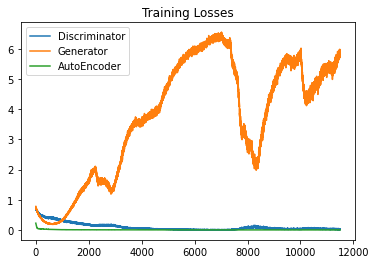

In [ ]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.plot(auto_loss, label='AutoEncoder')
plt.title("Training Losses")
plt.legend()

In [ ]:
enc_output = autoencoder_gan.encoder(x_train)
gen_recon = generator.predict(enc_output)

gen_rec_loss = tf.keras.losses.mse(gen_recon, x_train)

cnoc_in = np.concatenate((enc_output, x_train), axis=1)
dis_loss = discriminator.predict(cnoc_in)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(gen_rec_loss), pd.DataFrame(dis_loss)], axis=1)
results_df.columns = ['gen_loss','disc_loss']

print ('genb loss :', results_df['gen_loss'].mean() )

print ('disc loss :', results_df['disc_loss'].mean() )

genb loss : 0.2194652
disc loss : 0.99074775


In [ ]:
print ('85 percent genb loss:',  np.percentile(results_df['gen_loss'], 85) )

85 percent genb loss: 0.3702008366584774


In [ ]:
threshold = np.percentile(results_df['gen_loss'], 85) 

## Test Set

In [ ]:
enc_output = autoencoder_gan.encoder(x_test)
gen_recon = generator.predict(enc_output)

gen_rec_loss = tf.keras.losses.mse(gen_recon, x_test)

cnoc_in = np.concatenate((enc_output, x_test), axis=1)
dis_loss = discriminator.predict(cnoc_in)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(gen_rec_loss), pd.DataFrame(dis_loss), pd.DataFrame(y_test)], axis=1)
results_df.columns = ['gen_loss','disc_loss', 'y_test']
print ('genb loss normal:', results_df.loc[results_df['y_test'] == 0, 'gen_loss'].mean() )
print ('genb loss abnormal:', results_df.loc[results_df['y_test'] == 1, 'gen_loss'].mean() )

print ('disc loss normal:', results_df.loc[results_df['y_test'] == 0, 'disc_loss'].mean() )
print ('disc loss abnormal:', results_df.loc[results_df['y_test'] == 1, 'disc_loss'].mean() )

genb loss normal: 0.21528892
genb loss abnormal: 0.57365173
disc loss normal: 0.99175423
disc loss abnormal: 0.95726544


In [ ]:
norm = results_df.loc[results_df['y_test'] == 0, 'gen_loss']
ab_norm  = results_df.loc[results_df['y_test'] == 1, 'gen_loss']

print ('99 percent genb loss normal:',  np.percentile(norm, 96) )
print ('genb loss abnormal:', np.percentile(ab_norm,10)  )


99 percent genb loss normal: 0.7512176370620728
genb loss abnormal: 0.1277819812297821


In [ ]:
anomalies = (results_df.gen_loss > threshold)

from sklearn.metrics import classification_report

print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      7393
           1       0.85      0.66      0.75      9074

    accuracy                           0.75     16467
   macro avg       0.76      0.76      0.75     16467
weighted avg       0.77      0.75      0.75     16467



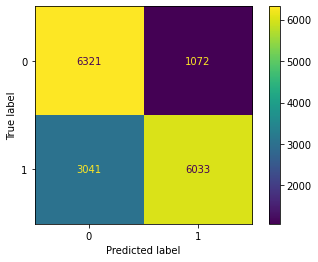

In [ ]:
disp_conf_matrix(y_test, anomalies)

## Supervised Machine Learning

In [ ]:
x_org = scaler.transform(x_org)

In [ ]:
# model for the binary classification
binary_model = RandomForestClassifier()
binary_model.fit(x_org, y_train)
binary_predictions = binary_model.predict(x_test)

# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

0.823950932167365

In [ ]:
print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.99      0.62      0.76      7478
           1       0.76      1.00      0.86      8989

    accuracy                           0.82     16467
   macro avg       0.88      0.81      0.81     16467
weighted avg       0.86      0.82      0.82     16467



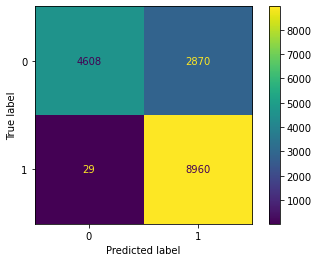

In [ ]:
disp_conf_matrix(y_test, binary_predictions)

In [ ]:
binary_model.feature_importances_

array([2.31687004e-02, 1.43497448e-02, 1.91102410e-02, 6.58026149e-02,
       3.93947350e-02, 4.11375181e-02, 8.04559013e-02, 2.53023857e-02,
       6.23706771e-02, 2.07193578e-02, 1.31511320e-02, 9.31353689e-03,
       1.78498282e-02, 1.38922963e-02, 1.64558829e-02, 1.18391715e-02,
       8.53414237e-03, 6.62412907e-03, 7.09860241e-03, 1.56306216e-03,
       2.57721045e-02, 2.30002984e-02, 1.35390263e-02, 5.10469452e-02,
       2.42506146e-02, 1.95330120e-03, 5.65676129e-03, 3.03017540e-02,
       5.06983670e-02, 7.90605722e-03, 1.08748091e-02, 3.89649641e-02,
       8.63446794e-02, 1.02646745e-04, 9.17014315e-05, 2.04712105e-03,
       8.87832820e-03, 4.77837856e-02, 1.76277643e-03, 4.89501832e-05,
       5.81048217e-03, 4.31351429e-04, 6.15991102e-04, 3.05378577e-03,
       5.57817701e-06, 1.94633235e-05, 2.45216074e-05, 3.52363671e-04,
       2.03581950e-05, 0.00000000e+00, 1.64649080e-06, 7.29465907e-07,
       4.23774366e-03, 1.45420402e-03, 5.10055293e-02, 3.80310089e-03,
      

##Unsupervised Anomaly Detection

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso_model=IsolationForest(n_estimators=500,max_samples='auto',contamination=float(0.2))

In [ ]:
iso_model.fit(x_org, y_train)
iso_binary_predictions = iso_model.predict(x_test)

In [ ]:
iso_binary_predictions_mod =  [pred if pred >= 0 else 0 for pred in iso_binary_predictions]

In [ ]:
# iso_binary_predictions_mod

In [ ]:
print(classification_report(y_test, iso_binary_predictions_mod))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65      7478
           1       0.74      0.45      0.56      8989

    accuracy                           0.61     16467
   macro avg       0.64      0.63      0.61     16467
weighted avg       0.65      0.61      0.60     16467



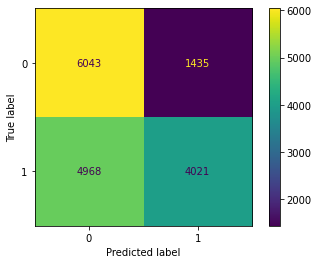

In [ ]:
disp_conf_matrix(y_test, iso_binary_predictions_mod)